In [1]:
# Importing the required libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler,PolynomialFeatures
from sklearn.linear_model import LinearRegression






In [10]:

df = pd.read_csv('dataset/housing_price.csv')

print(df.columns) # Display the column names
df.dtypes # Display the data types of each column using the attribute dtype



Index(['Unnamed: 0', 'id', 'date', 'price', 'bedrooms', 'bathrooms',
       'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition',
       'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


Unnamed: 0         int64
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [11]:
df.head() # Display the first 5 rows of the dataframe

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [6]:
df.describe() # Display a statistical summary of the dataframe


,Unnamed: 0,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21613.00000,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,10806.00000,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,6239.28002,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,0.00000,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,5403.00000,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,10806.00000,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,16209.00000,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,21612.00000,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [12]:
# Data Wrangling
df.drop(["id", "Unnamed: 0"], axis=1, inplace=True) # Drop the columns "id" and "Unnamed: 0" from axis 1 and inplace is set to True

print(df.columns)


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [ ]:

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Missing values columns
m1 = df['bedrooms'].isnull().sum()
print ("Number of missing values of bedrooms column :", m1)
m2 = df['bathrooms'].isnull().sum()
print ("Number of missing values of bathrooms column :", m2)



In [ ]:
# Fill missing values with mean
df['bedrooms'].fillna(df['bedrooms'].mean(), inplace=True)
df['bathrooms'].fillna(df['bathrooms'].mean(), inplace=True)

# Check for missing values
missing_values = df.isnull().sum()
print(missing_values)




In [28]:
# Data Standardization 
df['floors'] = df['floors'].astype(int)
df['floors'].head()


0    1
1    2
2    1
3    1
4    1
Name: floors, dtype: int32

In [29]:
# Data Normalization
df['bathrooms'] = df['bathrooms']/df['bathrooms'].max()
df['bathrooms'].head()





0    0.12500
1    0.28125
2    0.12500
3    0.37500
4    0.25000
Name: bathrooms, dtype: float64

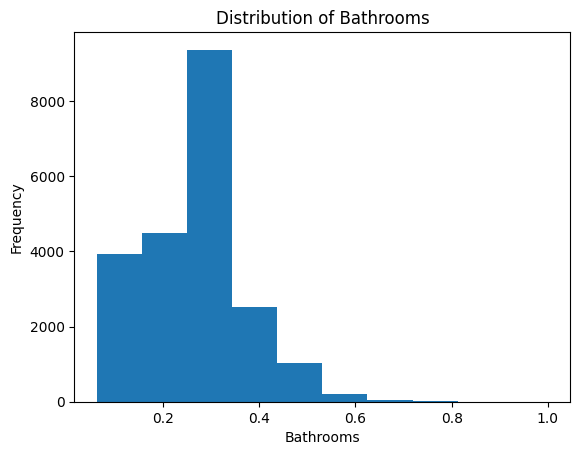

In [35]:
# distribution of the bedrooms
plt.hist(df['bathrooms'], bins=10)
plt.xlabel('Bathrooms')
plt.ylabel('Frequency')
plt.title('Distribution of Bathrooms')
plt.show()





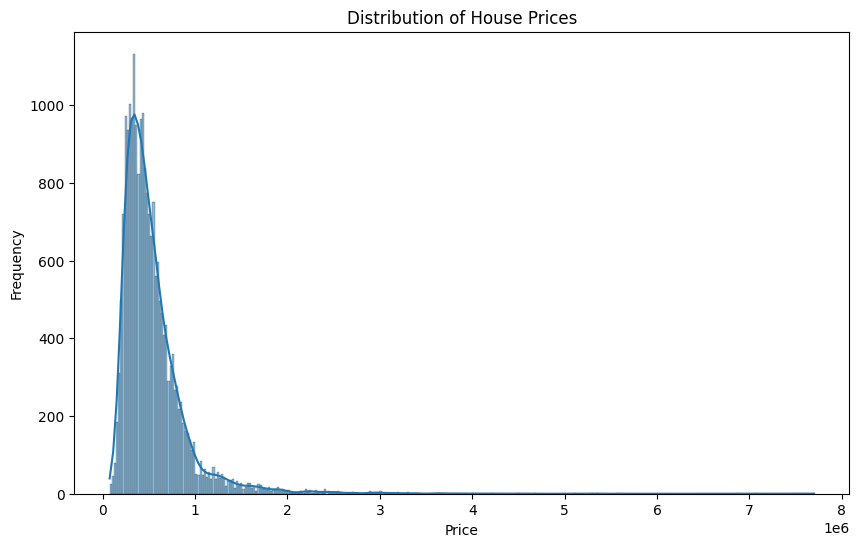

In [31]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True)
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.title('Distribution of House Prices')
plt.show()

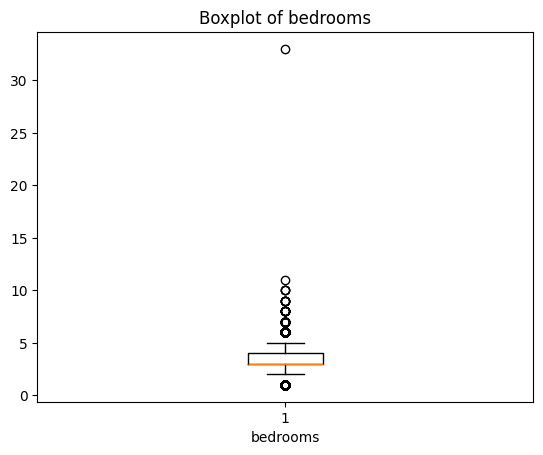

In [36]:
# Boxplot of bedrooms
plt.boxplot(df['bedrooms'])
plt.xlabel('bedrooms')
plt.title('Boxplot of bedrooms') 
plt.show()



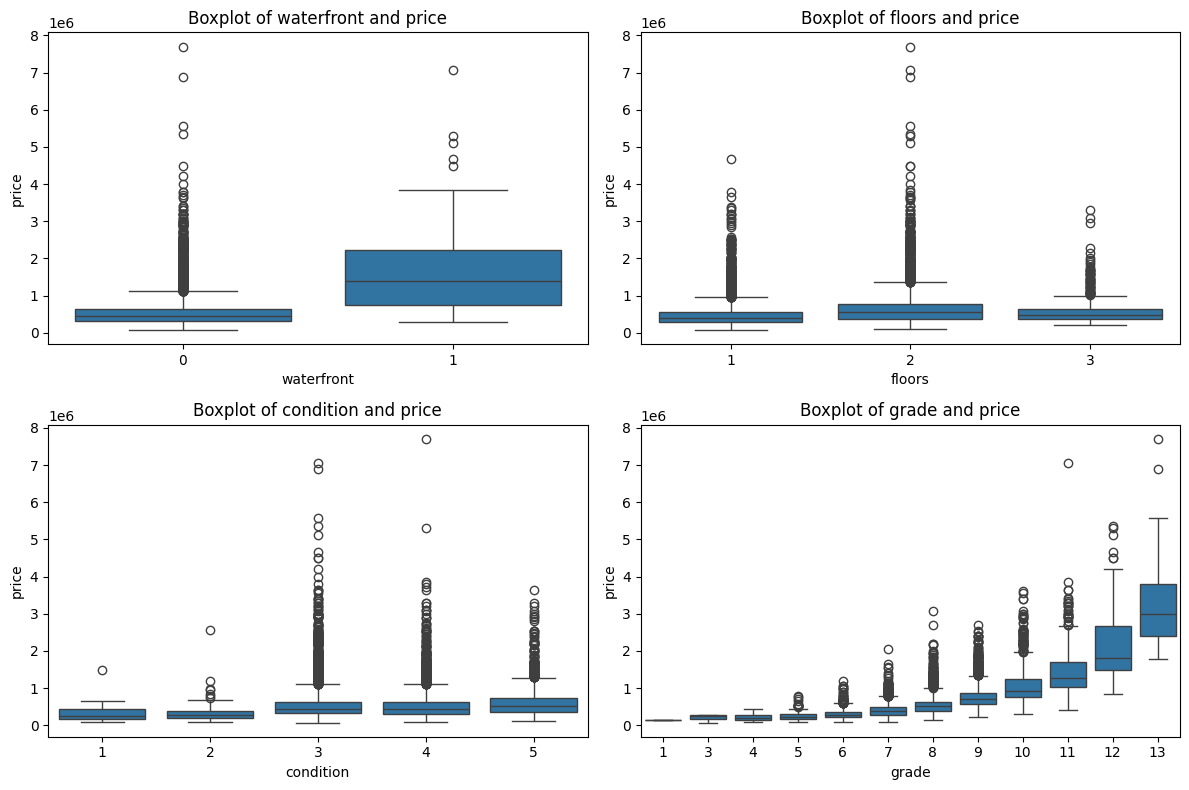

In [39]:
# Boxplot of waterfront
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
sns.boxplot(x='waterfront', y='price', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Boxplot of waterfront and price')

# Boxplot of floors
sns.boxplot(x='floors', y='price', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Boxplot of floors and price')

# Boxplot of condition
sns.boxplot(x='condition', y='price', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Boxplot of condition and price')

# Boxplot of grade
sns.boxplot(x='grade', y='price', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Boxplot of grade and price')

plt.tight_layout()
plt.show()


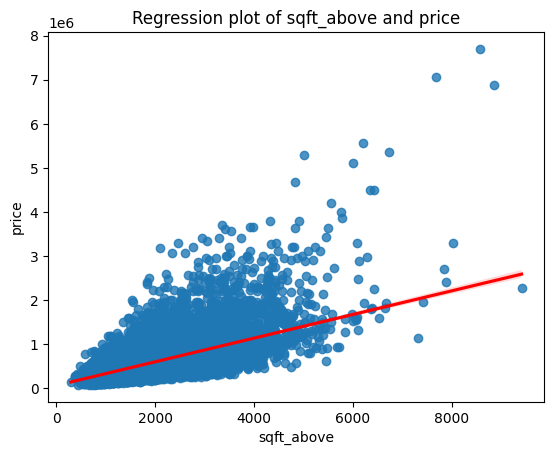

In [41]:
# determine if the feature 'sqft_above' is negatively or positively correlated with price
sns.regplot(x='sqft_above', y='price', data=df, line_kws={"color": "red"})
plt.title('Regression plot of sqft_above and price')
plt.show()



In [63]:
# Correlation of each feature with price
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime object
df.corr()['price'].sort_values() # Correlation of each feature with price



zipcode         -0.053203
date            -0.004357
long             0.021626
condition        0.036362
yr_built         0.054012
sqft_lot15       0.082447
sqft_lot         0.089661
yr_renovated     0.126434
floors           0.237211
waterfront       0.266369
lat              0.307003
bedrooms         0.308797
sqft_basement    0.323816
view             0.397293
bathrooms        0.525738
sqft_living15    0.585379
sqft_above       0.605567
grade            0.667434
sqft_living      0.702035
price            1.000000
Name: price, dtype: float64

In [88]:
# correlation matrix of the dataframe
correlation_matrix = df.corr()
print(correlation_matrix)



                   date     price  bedrooms  bathrooms  sqft_living  sqft_lot  \
date           1.000000 -0.004357 -0.016590  -0.034158    -0.034559  0.006313   
price         -0.004357  1.000000  0.308797   0.525738     0.702035  0.089661   
bedrooms      -0.016590  0.308797  1.000000   0.514194     0.578077  0.032307   
bathrooms     -0.034158  0.525738  0.514194   1.000000     0.755371  0.087929   
sqft_living   -0.034559  0.702035  0.578077   0.755371     1.000000  0.172826   
sqft_lot       0.006313  0.089661  0.032307   0.087929     0.172826  1.000000   
floors        -0.019079  0.237211  0.158155   0.520513     0.353321 -0.008951   
waterfront     0.001356  0.266369 -0.006800   0.063744     0.103818  0.021604   
view          -0.001800  0.397293  0.080058   0.188341     0.284611  0.074710   
condition     -0.050769  0.036362  0.026690  -0.126197    -0.058753 -0.008958   
grade         -0.039912  0.667434  0.356589   0.664676     0.762704  0.113621   
sqft_above    -0.027924  0.6

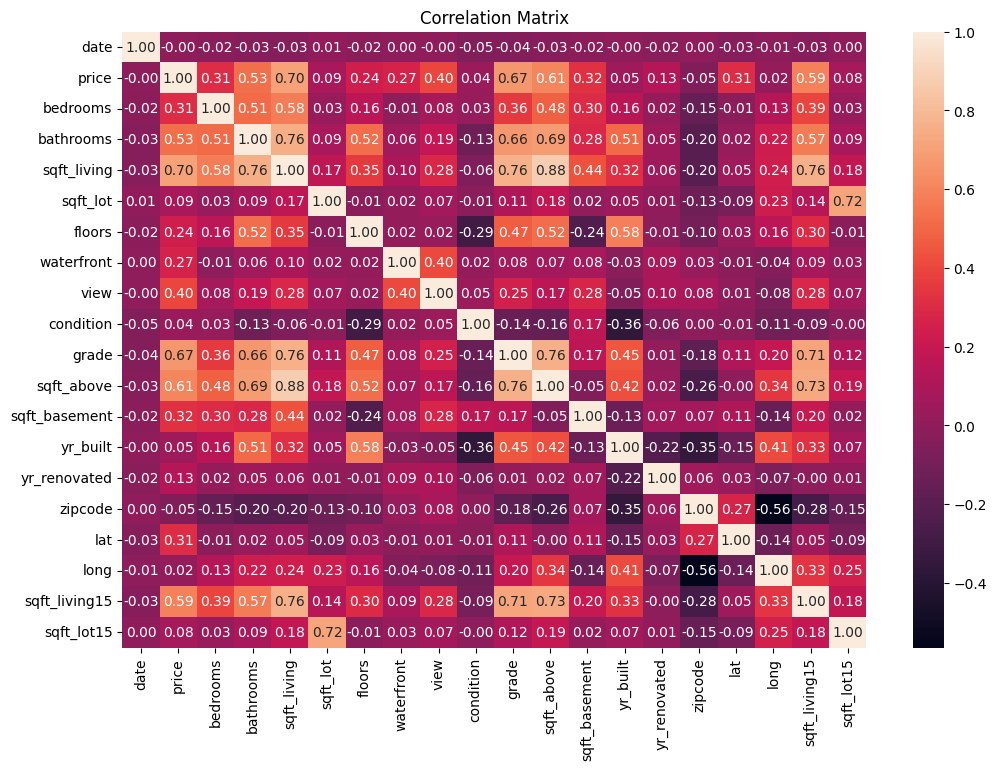

In [66]:
# Heatmap of the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


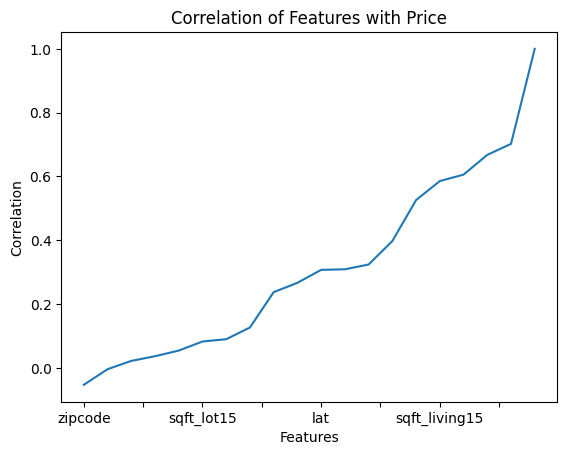

In [91]:
correlation = df.corr()['price'].sort_values()
correlation.plot(kind='line')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation of Features with Price')
plt.show()




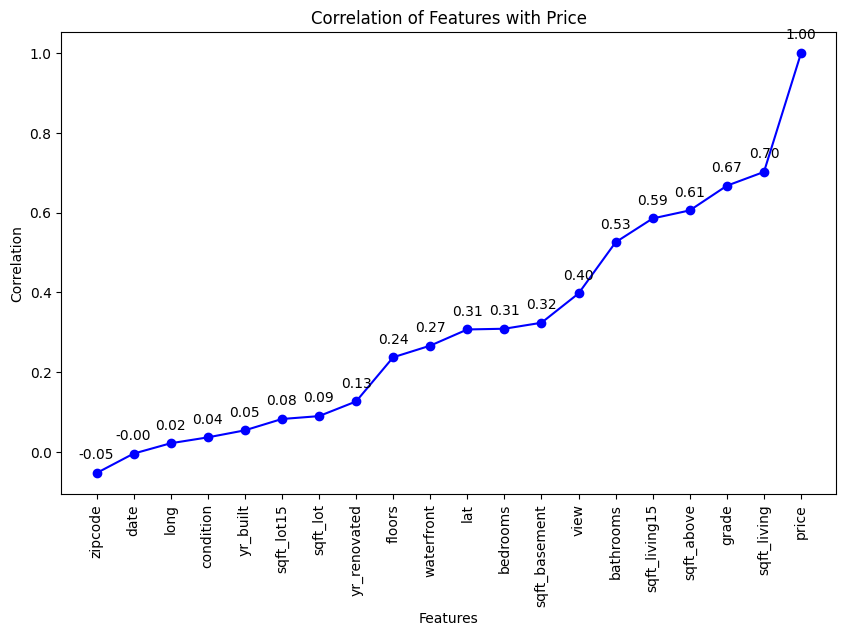

In [92]:
# correlation of each feature with price
correlation = df.corr()['price'].sort_values()
plt.figure(figsize=(10, 6))
plt.plot(correlation.index, correlation.values, marker='o', linestyle='-', color='blue')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.title('Correlation of Features with Price')

# Add markers on the intersection points
for i, corr in enumerate(correlation.values):
    plt.annotate(f'{corr:.2f}', (i, corr), textcoords="offset points", xytext=(0,10), ha='center')

# Make the horizontal line labels visible
plt.xticks(rotation=90)

plt.show()

In [93]:
# Model Development
# Simple Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict


# Using the 'long' feature to predict the price of the house
X = df[['long']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

mse = mean_squared_error(df['price'], lm.predict(X))
print('The mean squared error is: ', mse)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

# Find the intercept
print('The intercept is: ', lm.intercept_)

# Find the slope
print('The slope is: ', lm.coef_)



The mean squared error is:  134713108191.87683
The R-square is:  0.00046769430149007363
The intercept is:  7430229.310435702
The slope is:  [56377.72275781]


In [61]:

# Model Development
X = df[['sqft_living']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)

# Find the R^2
print('The R-square is: ', lm.score(X, Y))

# Find the intercept
print('The intercept is: ', lm.intercept_)

# Find the slope
print('The slope is: ', lm.coef_)


The R-square is:  0.4928532179037931
The intercept is:  -43580.74309447431
The slope is:  [280.6235679]


In [ ]:
# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)


In [ ]:
# Multiple Linear Regression Model
# Using the 'sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15' features to predict the price of the house
X = df[['sqft_living', 'bedrooms', 'bathrooms', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'lat', 'long', 'sqft_living15', 'sqft_lot15']]
Y = df['price']
lm = LinearRegression()
lm.fit(X, Y)
lm.score(X, Y)
